In [1]:
# We need to import these modules to get started
# For Mac
drive_path = '/Volumes/Brain2016'

# For windows
#drive_path = 'e:/'

import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import scipy.io
import seaborn as sns

%matplotlib notebook

from allensdk.core.brain_observatory_cache import BrainObservatoryCache
manifest_path = os.path.join(drive_path,'BrainObservatory/manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_path)

#Particular experiment with the particular imaging depth

experiment_container = boc.get_experiment_containers(targeted_structures=['VISp'],cre_lines=['Cux2-CreERT2'],imaging_depths=[275]);
print('length of VIal cux is', len(experiment_container))

# Number of the animal
animal_number=0;

container_id = experiment_container[animal_number]['id'];
experiment_information = boc.get_ophys_experiments(experiment_container_ids=[container_id]);

# session id and experiment
session_id = experiment_information[1]['id']
data_set = boc.get_ophys_experiment_data(ophys_experiment_id= session_id)

print ('Here is the experimental info for this session \n')
experiment_information

('length of VIal cux is', 4)
Here is the experimental info for this session 



[{'age_days': 144.0,
  'cre_line': u'Cux2-CreERT2',
  'experiment_container_id': 511510667,
  'id': 501498760,
  'imaging_depth': 275,
  'session_type': u'three_session_B',
  'targeted_structure': u'VISp'},
 {'age_days': 144.0,
  'cre_line': u'Cux2-CreERT2',
  'experiment_container_id': 511510667,
  'id': 501574836,
  'imaging_depth': 275,
  'session_type': u'three_session_A',
  'targeted_structure': u'VISp'},
 {'age_days': 144.0,
  'cre_line': u'Cux2-CreERT2',
  'experiment_container_id': 511510667,
  'id': 501773889,
  'imaging_depth': 275,
  'session_type': u'three_session_C',
  'targeted_structure': u'VISp'}]

In [2]:
#sg.stim_table;
from allensdk.brain_observatory.drifting_gratings import DriftingGratings
#dg = DriftingGratings(data_set=data_set)

In [3]:
# show all stimuli showed during this session

boc.get_all_stimuli()

['drifting_gratings',
 'locally_sparse_noise',
 'natural_movie_one',
 'natural_movie_three',
 'natural_movie_two',
 'natural_scenes',
 'spontaneous',
 'static_gratings']

In [4]:
# show the drifting gratings

stim_table_gratings = data_set.get_stimulus_table('drifting_gratings')

# stimuli with particular temporal frequency
stim_table_gratings.head()
#[(stim_table_gratings.temporal_frequency==2.0)]

,temporal_frequency,orientation,blank_sweep,start,end
0,1.0,0.0,0.0,737,796
1,2.0,270.0,0.0,827,887
2,1.0,180.0,0.0,918,977
3,8.0,225.0,0.0,1008,1068
4,8.0,180.0,0.0,1099,1158


In [5]:
# show the movie

stim_table_movie = data_set.get_stimulus_table('natural_movie_one')

# stimuli with particular temporal frequency
#stim_table_movie

In [6]:
# get corrected fluorescence traces

my_traces=data_set.get_corrected_fluorescence_traces()
# get only Ca traces, without time
my_traces_ca=my_traces[1]
time=my_traces[0]

#type(my_traces_ca)

<IPython.core.display.Javascript object>


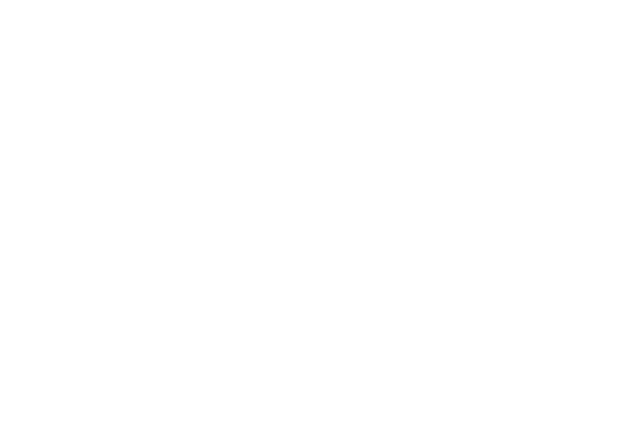

In [7]:
# Plot characteristic traces

plt.figure
plt.plot(time,my_traces_ca[0])
plt.title('Neuron 0 ca corrected')

In [8]:
# transpose the array and check its shape

my_traces_ca_transposed=np.transpose(my_traces_ca)
my_traces_ca_transposed.shape

(115730, 243)

In [9]:
df_traces = pd.DataFrame(my_traces_ca_transposed)

df_traces.head

<bound method DataFrame.head of                0           1           2           3           4    \
0       115.024475  134.391769  295.134491  222.261414  226.920731   
1       120.551514  137.653824  267.566040  223.191864  215.770416   
2       120.002090  129.347778  296.579437  226.425079  204.828735   
3       127.094955  134.506607  297.384705  220.670547  205.775604   
4       121.014725  134.276413  291.865295  216.580338  206.192047   
5       120.296654  134.456757  290.114319  224.012695  199.254517   
6       118.072891  132.756989  304.203888  223.943390  208.934708   
7       126.598831  137.812988  291.140259  215.253464  213.673218   
8       122.117516  131.967010  293.060272  199.024048  207.538040   
9       127.433472  133.577316  308.985229  211.166183  219.124527   
10      124.580078  134.149765  279.130676  220.576828  213.216049   
11      123.572746  137.609665  275.859161  198.845490  213.330688   
12      123.601692  143.146347  271.779022  222.705841  20

In [10]:
# Export corrected traces to csv

df_traces.to_csv('ca_corr_expID_511510667.csv')

## Make an array of good cells, are there any in our session?

In [11]:
# load the best cells, with the highest dF/F

best_ca_cells=np.load('ALL_GOOD_CELLS.npy')
len(best_ca_cells)

2896

In [12]:

my_cell_ids=data_set.get_cell_specimen_ids()

len(my_cell_ids)

# save cell ids into array
#from tempfile import TemporaryFile

#cell_ids=TemporaryFile()
np.save('cell_ids.npy',my_cell_ids)

In [13]:
good_cells=[]

for i in range(len(my_cell_ids)):
    for j in range(len(best_ca_cells)):
        if my_cell_ids[i]==best_ca_cells[j]:
            good_cells.append(my_cell_ids[i])
            
len(good_cells)            

57

## Import binary firing-rates

In [14]:
all_binary_spikes=pd.read_csv('all_spikes_binary_file.csv')

In [15]:

all_binary_spikes.head()

,Unnamed: 0,517477877,517477685,517473327,517474625,517479528,517479516,517479501,517474461,517479568,...,517472786,517474697,517473129,517473226,517473208,517474689,517473024,517478747,517475023,517476300
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
all_binary_spikes.shape

(115730, 243)

## Make an array of firing-rates

In [22]:
# Summing up the spikes

N=len(my_cell_ids)
trials=len(stim_table_gratings)

all_firing_rates=np.zeros([trials,N])

for i in range(trials):
    start=stim_table_gratings['start'][i]
    end=stim_table_gratings['end'][i]
    for j in range(N-1):
        all_firing_rates[i][j]=sum( all_binary_spikes[str(my_cell_ids[j])][start:end] )        
        

# Test the shape

all_firing_rates.shape

(628, 243)

In [25]:
# Save binned firing rates to the file

all_firing_rates_file = pd.DataFrame(all_firing_rates,columns=my_cell_ids)
#all_firing_rates_file.to_csv('all_firing_rates.csv')

In [ ]:
all_firing_rates_file.head()

In [ ]:
%matplotlib notebook

plt.imshow(all_firing_rates_file.T)
plt.xlabel('time (s)')
plt.ylabel('Neuron ID')

## Load computed firing-rates per neuron

In [ ]:
all_firing_rates_file.head()

In [ ]:
all_firing_rates_file.shape

In [ ]:
all_firing_rates_file.head()

In [ ]:
# File with firing-rates from Reza

test=np.load('fr.npy')
test[0]

In [ ]:
stim_table_gratings.head()

## Compute DSI based on firing-rate

In [26]:
# Call of different stimulation frequencies, indexes

tf1=stim_table_gratings[(stim_table_gratings.temporal_frequency==1.0)]
tf2=stim_table_gratings[(stim_table_gratings.temporal_frequency==2.0)]
tf4=stim_table_gratings[(stim_table_gratings.temporal_frequency==4.0)]
tf8=stim_table_gratings[(stim_table_gratings.temporal_frequency==8.0)]

# Call for different gratings orientations, over all temporal frequencies

gr0=stim_table_gratings[(stim_table_gratings.orientation==0.0)]
gr45=stim_table_gratings[(stim_table_gratings.orientation==45.0)]

gr90=stim_table_gratings[(stim_table_gratings.orientation==90.0)]
gr135=stim_table_gratings[(stim_table_gratings.orientation==135.0)]

gr180=stim_table_gratings[(stim_table_gratings.orientation==180.0)]
gr225=stim_table_gratings[(stim_table_gratings.orientation==225.0)]

gr270=stim_table_gratings[(stim_table_gratings.orientation==270.0)]
gr315=stim_table_gratings[(stim_table_gratings.orientation==315.0)]


In [27]:
# Compute the direction-selectivity index for all cells

N=len(my_cell_ids)
all_dsi=np.zeros(N)

for j in range(N):

    r0=np.mean(all_firing_rates_file[my_cell_ids[j]][gr0.index].values)
    r45=np.mean(all_firing_rates_file[my_cell_ids[j]][gr45.index].values)

    r90=np.mean(all_firing_rates_file[my_cell_ids[j]][gr90.index].values)
    r135=np.mean(all_firing_rates_file[my_cell_ids[j]][gr135.index].values)

    r180=np.mean(all_firing_rates_file[my_cell_ids[j]][gr180.index].values)
    r225=np.mean(all_firing_rates_file[my_cell_ids[j]][gr225.index].values)

    r270=np.mean(all_firing_rates_file[my_cell_ids[j]][gr270.index].values)
    r315=np.mean(all_firing_rates_file[my_cell_ids[j]][gr315.index].values)

    rates=['r0','r45','r90','r135','r180','r225','r270','r315']
    freq=[r0,r45,r90,r135,r180,r225,r270,r315]

    # concatentate two lists
    rates_freq=zip(rates, freq)

    # sort the list
    rates_freq=sorted(rates_freq, key=lambda x: x[1])
    rates_freq

    # finding the maximal prefered orientation
    pref=rates_freq[-1][1]

    # find the opposite orientation
    if rates_freq[-1][0] == 'r0':
        non_pref=freq[4]    
    elif rates_freq[-1][0] == 'r45':
        non_pref=freq[5]    
    elif rates_freq[-1][0] == 'r90':
        non_pref=freq[6]    
    elif rates_freq[-1][0] == 'r135':
        non_pref=freq[7]    
    elif rates_freq[-1][0] == '180':
        non_pref=freq[0]    
    elif rates_freq[-1][0] == 'r225':
        non_pref=freq[1]    
    elif rates_freq[-1][0] == 'r270':
        non_pref=freq[2]    
    elif rates_freq[-1][0] == 'r315':
        non_pref=freq[3]
    
    
    if pref>non_pref:
        dsi=(pref-non_pref)/(pref+non_pref)
    elif non_pref>pref:                     # if non-pref > pref, by definition it is pref
        dsi=(non_pref-pref)/(pref+non_pref)
    elif non_pref==pref:
        dsi=0

    all_dsi[j]=dsi
    
all_dsi=all_dsi[0:-1]
all_dsi

array([ 0.5       ,  0.65898618,  0.65289256,  0.79472141,  0.14171801,
        0.36842105,  0.25564271,  0.13333333,  0.03703704,  0.68421053,
        0.41666667,  0.8683274 ,  0.98791541,  0.95428571,  0.39825466,
        0.78571429,  0.41137124,  0.72519084,  0.83050847,  0.32051282,
        0.72680412,  0.68879668,  0.00671141,  0.66510119,  0.84090909,
        0.2795389 ,  0.41666667,  0.36363636,  0.65625   ,  0.5       ,
        0.0543131 ,  0.9       ,  0.4       ,  0.48529412,  0.16782007,
        0.96032438,  0.92687747,  0.01960784,  1.        ,  0.45985401,
        0.50501672,  0.72121524,  0.43205721,  0.33333333,  0.81818182,
        0.95      ,  0.625     ,  0.95973154,  0.42857143,  0.79518072,
        0.41099855,  0.23076923,  0.79591837,  0.75545852,  0.83783784,
        0.60427807,  0.67741935,  0.25      ,  0.52      ,  0.96619718,
        0.78947368,  0.79060028,  0.90126751,  1.        ,  0.85535198,
        0.33333333,  0.95744681,  0.86090226,  1.        ,  0.90

In [28]:
type(all_dsi)

numpy.ndarray

In [29]:
# save dsi to the numpy array

np.save('All_DSI_rate.npy',all_dsi)

<IPython.core.display.Javascript object>


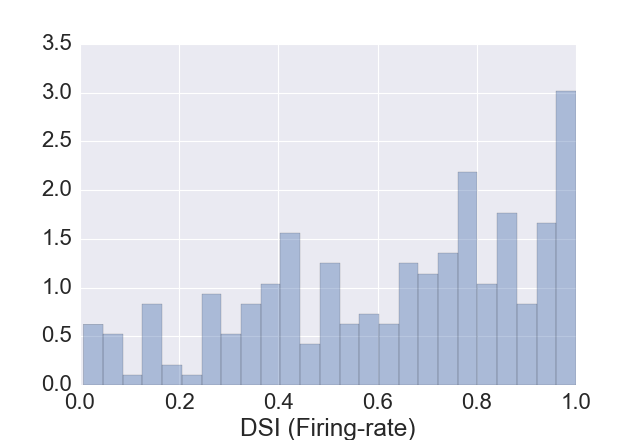

In [41]:
# Make histogram for DSI based on firing-rate

%matplotlib notebook
sns.set(font='sans-serif', font_scale=2)

x = pd.Series(all_dsi, name="DSI (Firing-rate)")
sns.distplot(x,hist=True,norm_hist=True,bins=25,kde=False)


## Compute the DSI for all cells based on ca responses

In [42]:

cell_specimens_df = pd.DataFrame(boc.get_cell_specimens(experiment_container_ids=[container_id]))
cell_specimens_df.head()

,area,cell_specimen_id,dsi_dg,experiment_container_id,imaging_depth,osi_dg,osi_sg,p_dg,p_ns,p_sg,...,pref_sf_sg,pref_tf_dg,time_to_peak_ns,time_to_peak_sg,tld1_id,tld1_name,tld2_id,tld2_name,tlr1_id,tlr1_name
0,VISp,517472604,0.147322,511510667,275,1.007296,NaN,2.583655e-04,NaN,NaN,...,NaN,8.0,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
1,VISp,517472612,0.731144,511510667,275,0.603487,NaN,1.219217e-08,NaN,NaN,...,NaN,2.0,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
2,VISp,517472625,2.197900,511510667,275,0.822440,1.828199,3.513894e-01,2.727466e-18,1.411308e-10,...,0.02,2.0,0.29862,0.26544,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
3,VISp,517472636,0.822916,511510667,275,0.991756,NaN,4.156565e-12,NaN,NaN,...,NaN,2.0,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
4,VISp,517472646,0.091497,511510667,275,1.145865,0.214285,9.397905e-20,1.897870e-53,1.437596e-42,...,0.32,4.0,0.16590,0.23226,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)


In [43]:
# get specific cells, recorded over all sessions?

cell_specimens_df[cell_specimens_df['cell_specimen_id'].isin(my_cell_ids)]

,area,cell_specimen_id,dsi_dg,experiment_container_id,imaging_depth,osi_dg,osi_sg,p_dg,p_ns,p_sg,...,pref_sf_sg,pref_tf_dg,time_to_peak_ns,time_to_peak_sg,tld1_id,tld1_name,tld2_id,tld2_name,tlr1_id,tlr1_name
0,VISp,517472604,0.147322,511510667,275,1.007296,NaN,2.583655e-04,NaN,NaN,...,NaN,8.0,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
1,VISp,517472612,0.731144,511510667,275,0.603487,NaN,1.219217e-08,NaN,NaN,...,NaN,2.0,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
2,VISp,517472625,2.197900,511510667,275,0.822440,1.828199,3.513894e-01,2.727466e-18,1.411308e-10,...,0.02,2.0,0.29862,0.26544,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
3,VISp,517472636,0.822916,511510667,275,0.991756,NaN,4.156565e-12,NaN,NaN,...,NaN,2.0,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
4,VISp,517472646,0.091497,511510667,275,1.145865,0.214285,9.397905e-20,1.897870e-53,1.437596e-42,...,0.32,4.0,0.16590,0.23226,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
5,VISp,517472674,0.532662,511510667,275,1.038777,NaN,1.724492e-04,NaN,NaN,...,NaN,1.0,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
6,VISp,517472686,0.884172,511510667,275,1.298119,NaN,2.528827e-13,NaN,NaN,...,NaN,1.0,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
7,VISp,517472699,0.944625,511510667,275,1.083956,NaN,2.381258e-27,NaN,NaN,...,NaN,8.0,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
8,VISp,517472737,0.936931,511510667,275,0.919592,1.188772,2.230647e-09,1.385189e-31,6.376114e-34,...,0.02,4.0,0.33180,0.09954,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
9,VISp,517472742,1.105268,511510667,275,3.113287,NaN,7.622242e-09,NaN,NaN,...,NaN,4.0,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)


In [44]:
# get their estimated DSI

dsi_calcium=cell_specimens_df[cell_specimens_df['cell_specimen_id'].isin(my_cell_ids)]['dsi_dg']


<IPython.core.display.Javascript object>


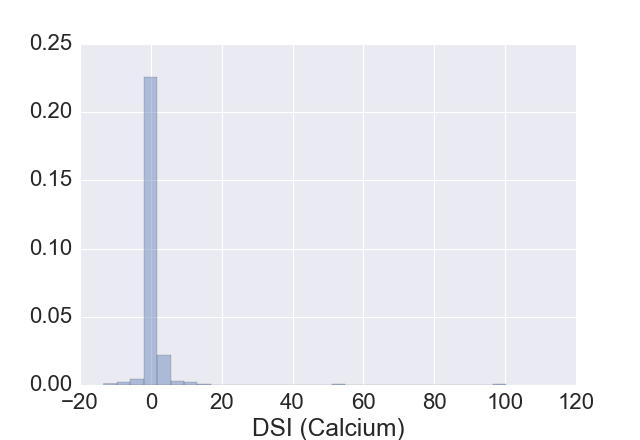

In [46]:
# Make a histogram based on DSI for Calcium

#type(dsi_calcium)

%matplotlib notebook

plt.figure
x = pd.Series(dsi_calcium, name="DSI (Calcium)")
sns.distplot(x,hist=True,norm_hist=True,kde=False, bins=30)